In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_january = pd.read_csv('Sales_January_2019.csv')
df_february = pd.read_csv('Sales_February_2019.csv')
df_march = pd.read_csv('Sales_March_2019.csv')
df_may = pd.read_csv('Sales_May_2019.csv')
df_april = pd.read_csv('Sales_April_2019.csv')
df_june = pd.read_csv('Sales_June_2019.csv')
df_july = pd.read_csv('Sales_July_2019.csv')
df_august = pd.read_csv('Sales_August_2019.csv')
df_october = pd.read_csv('Sales_October_2019.csv')
df_september = pd.read_csv('Sales_September_2019.csv')
df_november = pd.read_csv('Sales_November_2019.csv')
df_december = pd.read_csv('Sales_December_2019.csv')

In [ ]:
df_january.head()

In [ ]:
df_september.head()

In [ ]:
#Concatenating 
lista = [df_january, df_february, df_march, df_april, df_may,
         df_june, df_july, df_august, df_october, df_september,
         df_november, df_december]

df_concat = pd.DataFrame()
for i in range(len(lista)):
  df_concat = pd.concat([df_concat, lista[i]], axis=0)

In [ ]:
df_concat.shape

In [ ]:
import os
files = [file for file in os.listdir()]
files

In [ ]:
#Pior jeito possível
removal = ['.config', 'sample_data']
files.remove(removal[0])
files.remove(removal[1])

In [ ]:
df_all_months = pd.DataFrame()
for file in files:
  df = pd.read_csv(file)
  df_all_months = pd.concat([df_all_months, df])

In [ ]:
df_all_months.to_csv('all_data.csv')

In [138]:
df = pd.read_csv('all_data.csv')

## Task 1
What was the best month for sales? How much was earned that month?

First we gotta do some data cleaning before creating a new column

In [116]:
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Unnamed: 0        186850 non-null  int64 
 1   Order ID          186305 non-null  object
 2   Product           186305 non-null  object
 3   Quantity Ordered  186305 non-null  object
 4   Price Each        186305 non-null  object
 5   Order Date        186305 non-null  object
 6   Purchase Address  186305 non-null  object
dtypes: int64(1), object(6)
memory usage: 10.0+ MB


In [139]:
index = df[df['Order Date'] == 'Order Date'].index

In [140]:
df.drop(index=index, axis=0, inplace=True)

In [141]:
df[df['Order Date'] == 'Order Date']

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [142]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M' )

In [122]:
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,295665,Macbook Pro Laptop,1,1700,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001"
1,1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001"
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001"
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016"
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301"


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186495 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Unnamed: 0        186495 non-null  int64         
 1   Order ID          185950 non-null  object        
 2   Product           185950 non-null  object        
 3   Quantity Ordered  185950 non-null  object        
 4   Price Each        185950 non-null  object        
 5   Order Date        185950 non-null  datetime64[ns]
 6   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 11.4+ MB


In [143]:
#Adding a new month column
df['month'] = df['Order Date'].dt.month

In [125]:
df.head(3)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,0,295665,Macbook Pro Laptop,1,1700,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12.0
1,1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12.0
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12.0


In [144]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [145]:
df['Price Each'] = df['Price Each'].astype(float)
df['Quantity Ordered'] = df['Quantity Ordered'].astype(float)

In [146]:
df['sales'] = df['Price Each'] * df['Quantity Ordered']
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12.0,1700.00
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12.0,600.00
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12.0,11.95
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12.0,149.99
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12.0,11.95
5,295670,AA Batteries (4-pack),1.0,3.84,2019-12-31 22:58:00,"200 Jefferson St, New York City, NY 10001",12.0,3.84
6,295671,USB-C Charging Cable,1.0,11.95,2019-12-16 15:10:00,"928 12th St, Portland, OR 97035",12.0,11.95
7,295672,USB-C Charging Cable,2.0,11.95,2019-12-13 09:29:00,"813 Hickory St, Dallas, TX 75001",12.0,23.90
8,295673,Bose SoundSport Headphones,1.0,99.99,2019-12-15 23:26:00,"718 Wilson St, Dallas, TX 75001",12.0,99.99
9,295674,AAA Batteries (4-pack),4.0,2.99,2019-12-28 11:51:00,"77 7th St, Dallas, TX 75001",12.0,11.96


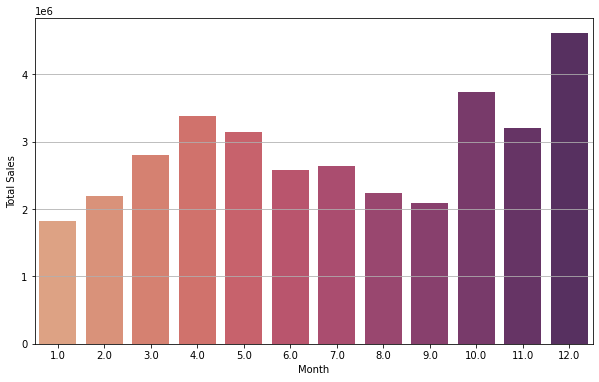

In [129]:
#Now let's try to solve the first task
#First we need the value of total sales of each month
sales_per_month = df.groupby('month').sum()

plt.figure(figsize=(10,6))
sns.barplot(x = sales_per_month.index, y=sales_per_month['sales'], palette='flare')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.grid(axis='y')

In [130]:
#Data Frame to visualize the difference between values
df_sales = pd.DataFrame({'Total Sales': sales_per_month['sales']})

df_sales.sort_values('Total Sales', ascending=False)

,Total Sales
month,
12.0,4.613443e+06
10.0,3.736727e+06
4.0,3.390670e+06
11.0,3.199603e+06
5.0,3.152607e+06
3.0,2.807100e+06
7.0,2.647776e+06
6.0,2.577802e+06
8.0,2.244468e+06


December and October are the best months. A good insight is to put the best-selling products (will be analysed later on) on sale in those months.

## Task 2
What city sold the most product

In [131]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12.0,1700.00
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12.0,600.00
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12.0,11.95
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12.0,149.99
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12.0,11.95


In [194]:
#Getting the cities and state
df['cities'] = df['Purchase Address'].str.split(',').str.get(1) + ' ' + '(' + df['Purchase Address'].str.split(',').str.get(2).str.split(' ').str.get(1) + ')'

In [195]:
df.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,cities
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12.0,1700.00,New York City (NY)
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12.0,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12.0,11.95,New York City (NY)
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12.0,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12.0,11.95,Atlanta (GA)
5,295670,AA Batteries (4-pack),1.0,3.84,2019-12-31 22:58:00,"200 Jefferson St, New York City, NY 10001",12.0,3.84,New York City (NY)
6,295671,USB-C Charging Cable,1.0,11.95,2019-12-16 15:10:00,"928 12th St, Portland, OR 97035",12.0,11.95,Portland (OR)
7,295672,USB-C Charging Cable,2.0,11.95,2019-12-13 09:29:00,"813 Hickory St, Dallas, TX 75001",12.0,23.90,Dallas (TX)
8,295673,Bose SoundSport Headphones,1.0,99.99,2019-12-15 23:26:00,"718 Wilson St, Dallas, TX 75001",12.0,99.99,Dallas (TX)
9,295674,AAA Batteries (4-pack),4.0,2.99,2019-12-28 11:51:00,"77 7th St, Dallas, TX 75001",12.0,11.96,Dallas (TX)


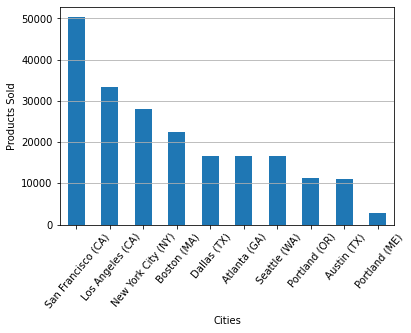

In [200]:
df_cities = df.groupby('cities').sum()['Quantity Ordered'].sort_values(ascending=False)
df_cities.plot(kind='bar')
plt.grid(axis='y')
plt.xticks(rotation = 50)
plt.xlabel('Cities')
plt.ylabel('Products Sold');

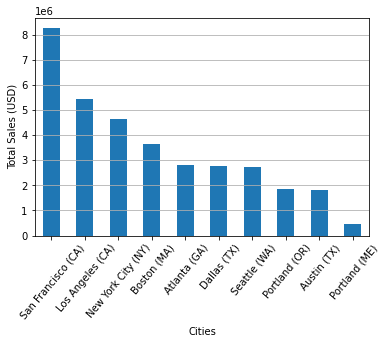

In [201]:
df_cities_sales = df.groupby('cities').sum()['sales'].sort_values(ascending=False)
df_cities_sales.plot(kind='bar')
plt.grid(axis='y')
plt.xticks(rotation = 50);
plt.xlabel('Cities')
plt.ylabel('Total Sales (USD)');

## Task 3
What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [202]:
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,cities
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12.0,1700.00,New York City (NY)
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12.0,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12.0,11.95,New York City (NY)
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12.0,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12.0,11.95,Atlanta (GA)
5,295670,AA Batteries (4-pack),1.0,3.84,2019-12-31 22:58:00,"200 Jefferson St, New York City, NY 10001",12.0,3.84,New York City (NY)
6,295671,USB-C Charging Cable,1.0,11.95,2019-12-16 15:10:00,"928 12th St, Portland, OR 97035",12.0,11.95,Portland (OR)
7,295672,USB-C Charging Cable,2.0,11.95,2019-12-13 09:29:00,"813 Hickory St, Dallas, TX 75001",12.0,23.90,Dallas (TX)
8,295673,Bose SoundSport Headphones,1.0,99.99,2019-12-15 23:26:00,"718 Wilson St, Dallas, TX 75001",12.0,99.99,Dallas (TX)
9,295674,AAA Batteries (4-pack),4.0,2.99,2019-12-28 11:51:00,"77 7th St, Dallas, TX 75001",12.0,11.96,Dallas (TX)


In [203]:
#I will answer this task by considerating only the hour
#that the product was bought
df['hour'] = df['Order Date'].dt.hour

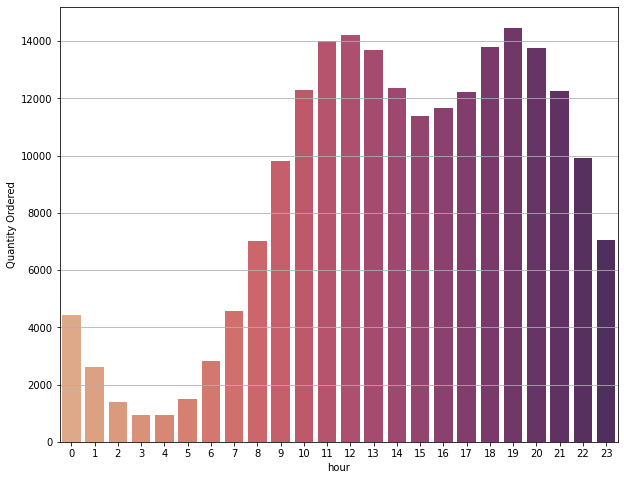

In [204]:
df_sale_time = df.groupby('hour').sum().sort_values('Quantity Ordered', ascending=False)
df_sale_time.index = df_sale_time.index.astype(int)

plt.figure(figsize=(10,8))
sns.barplot(x = df_sale_time.index, y = df_sale_time['Quantity Ordered'], palette='flare')
plt.grid(axis='y')

The best time to display advertisement, based on the time the costumers bought a product, are in the range of 11 - 13am and 6-8pm.

##Task 3
What products are most often sold together?


In [205]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,cities,hour
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12.0,1700.00,New York City (NY),0.0
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12.0,600.00,New York City (NY),7.0
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12.0,11.95,New York City (NY),18.0
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12.0,149.99,San Francisco (CA),15.0
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12.0,11.95,Atlanta (GA),12.0


In this problem we are going to check where are the duplicated ID's in Order ID column, so we can 
see the items that were sold together (in the same order).

In [206]:
df_duplicated = df[df['Order ID'].duplicated(keep=False)]

In [207]:
df_duplicated.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,cities,hour
16,295681,Google Phone,1.0,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12.0,600.00,Boston (MA),12.0
17,295681,USB-C Charging Cable,1.0,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12.0,11.95,Boston (MA),12.0
18,295681,Bose SoundSport Headphones,1.0,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12.0,99.99,Boston (MA),12.0
19,295681,Wired Headphones,1.0,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12.0,11.99,Boston (MA),12.0
36,295698,Vareebadd Phone,1.0,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12.0,400.00,New York City (NY),14.0
37,295698,USB-C Charging Cable,2.0,11.95,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12.0,23.90,New York City (NY),14.0
42,295703,AA Batteries (4-pack),1.0,3.84,2019-12-17 12:27:00,"502 Jefferson St, Austin, TX 73301",12.0,3.84,Austin (TX),12.0
43,295703,Bose SoundSport Headphones,1.0,99.99,2019-12-17 12:27:00,"502 Jefferson St, Austin, TX 73301",12.0,99.99,Austin (TX),12.0
66,295726,iPhone,1.0,700.00,2019-12-25 14:49:00,"203 Lakeview St, Boston, MA 02215",12.0,700.00,Boston (MA),14.0
67,295726,Lightning Charging Cable,1.0,14.95,2019-12-25 14:49:00,"203 Lakeview St, Boston, MA 02215",12.0,14.95,Boston (MA),14.0


In [212]:
df_duplicated.groupby('Order ID')['Product'].apply(lambda x: ','.join(x))

Order ID
141275              USB-C Charging Cable,Wired Headphones
141290     Apple Airpods Headphones,AA Batteries (4-pack)
141365                   Vareebadd Phone,Wired Headphones
141384                  Google Phone,USB-C Charging Cable
141450            Google Phone,Bose SoundSport Headphones
                               ...                       
319536                Macbook Pro Laptop,Wired Headphones
319556                      Google Phone,Wired Headphones
319584                            iPhone,Wired Headphones
319596                    iPhone,Lightning Charging Cable
319631    34in Ultrawide Monitor,Lightning Charging Cable
Name: Product, Length: 7136, dtype: object